In [1]:
# Para conocer el enunciado del problema, consultar el libro:
# Metodos Numericos Aplicados a la Ingeniería: Casos de estudio utilizando MATLAB (2014)
# por Héctor Jorquera y Claudio Gelmi
# 
# Código Python escrito por Claudio Gelmi, Ph.D.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares

In [3]:
# Leemos datos experimentales
almidon_data = np.loadtxt('almidon.txt') # , delimiter=' ')
tiempo = almidon_data[:, 0]
almidon = almidon_data[:, 1]

In [4]:
# Modelo
def css(t, x, params):
    # Parámetros
    yxs, ms = params
    mumax, kd, k, yxni, kn = 0.23, 0.025, 1.34e-4, 20.4, 7e-4
    # Ecuaciones diferenciales
    # Biomasa
    dx1 = mumax*x[2]/(kn + x[2])*x[0] - kd*x[0]
    # Úrea [2] y nitrógeno intermediario [3]
    if x[1] > 0:
        dx2 = -k
        dx3 = 0.47*k - mumax*x[2]/(kn + x[2])*x[0]/yxni
    else:
        dx2 = 0
        dx3 = 0 - mumax*x[2]/(kn + x[2])*x[0]/yxni
    # Almidón
    dx4 = -mumax*x[2]*x[0]/(kn + x[2])/yxs - ms*x[0]
    return [dx1, dx2, dx3, dx4]

# Rango de integración para todos los casos
t_span = (0, 150)

# Construimos los residuos: diferencia entre el modelo y los datos experimentales de almidón
def int_css(params):
    X0 = [4.7e-3, 3.5e-3, 0, 0.18]
    # Evaluamos la integración para los mismos tiempos experimentales
    sol = solve_ivp(css, t_span, X0, args=(params,), t_eval=tiempo)
    return sol.y[3] - almidon

# Rutina de optimización least_squares
initial_guess = [1.0, 0.5]
result = least_squares(int_css, initial_guess)

# Extraemos los parámetros encontrados
params = result.x

print("Mensaje de convergencia:", result.message)
print('Parámetros encontrados:')
print('  yxs:', round(params[0], 2))
print('  ms:', round(params[1], 3))
print(f'- El error es (resnorm): {round(2*result.cost,4)}')

Mensaje de convergencia: `gtol` termination condition is satisfied.
Parámetros encontrados:
  yxs: 1.99
  ms: 0.104
- El error es (resnorm): 0.0243


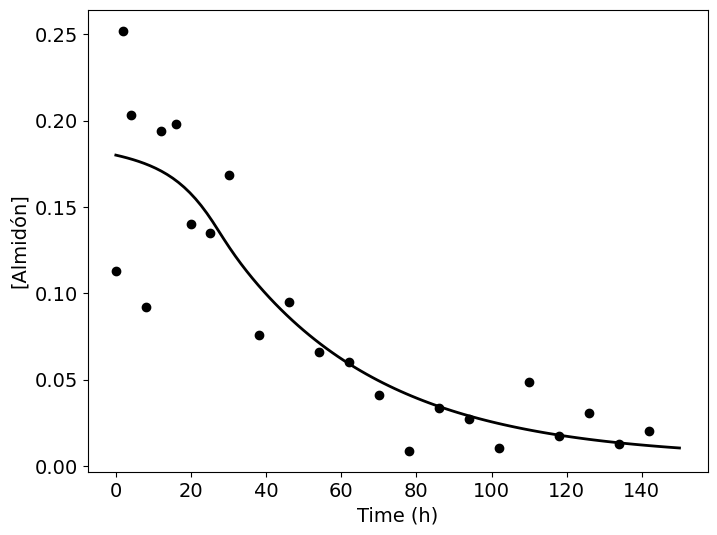

In [5]:
# Comparación entre datos experimentales y modelo
X0 = [4.7e-3, 3.5e-3, 0, 0.18]
t_sim = np.linspace(0, 150, 100)
almidon_sim = solve_ivp(css, t_span, X0, args=(params,), t_eval=t_sim).y[3]

plt.figure(figsize=(8,6))
plt.plot(tiempo, almidon, 'ko')
plt.plot(t_sim, almidon_sim, 'k-', lw=2)
plt.xlabel('Time (h)', fontsize=14)
plt.ylabel('[Almidón]', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.show()